In [2]:
pip install -r requirements.txt

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: C:\Users\Надияр\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


shape (8950, 18)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   in

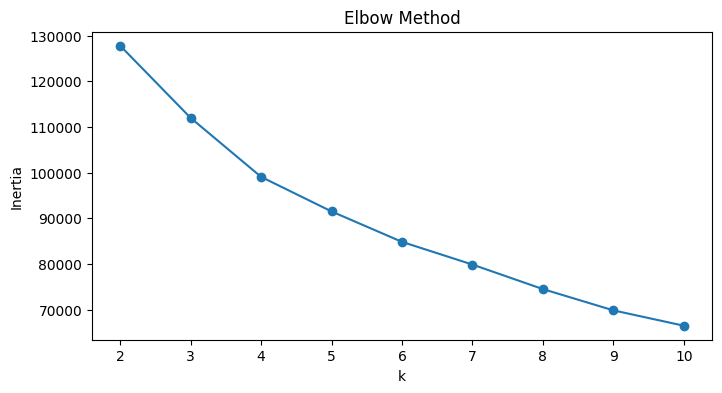

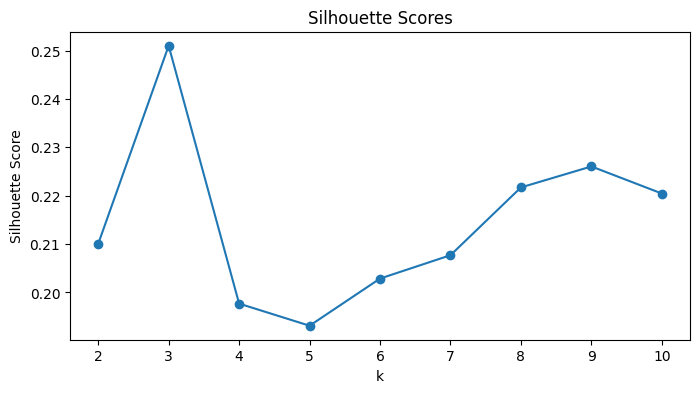

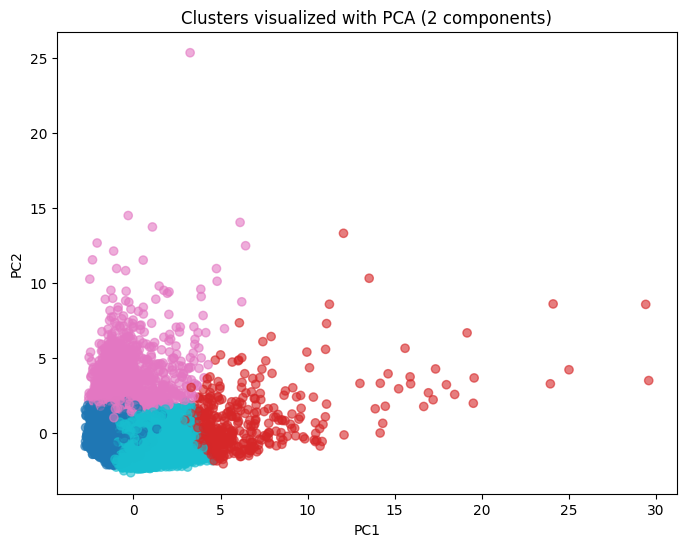

In [1]:
# notebook_bank_segmentation.py
# Ячейка 1. Импорты
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import joblib


# Ячейка 2. Загрузка данных
df = pd.read_csv('credit_card_data.csv')
print('shape', df.shape)
df.head()


# Ячейка 3. Быстрый EDA
print(df.info())
print(df.describe().T)


# Ячейка 4. Обработка пропусков
# Если есть пропуски — заполняем медианой
imputer = SimpleImputer(strategy='median')
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
df[num_cols] = imputer.fit_transform(df[num_cols])


# Ячейка 5. Масштабирование
scaler = StandardScaler()
X = df[num_cols].copy()
X_scaled = scaler.fit_transform(X)


# Ячейка 6. Поиск оптимального k — метод локтя
inertia = []
K = range(2,11)
for k in K:
 kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
 kmeans.fit(X_scaled)
 inertia.append(kmeans.inertia_)


plt.figure(figsize=(8,4))
plt.plot(K, inertia, '-o')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()


# Ячейка 7. Коэффициент силуэта
sil_scores = []
for k in K:
 kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
 labels = kmeans.fit_predict(X_scaled)
 sil_scores.append(silhouette_score(X_scaled, labels))


plt.figure(figsize=(8,4))
plt.plot(K, sil_scores, '-o')
plt.xlabel('k')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores')
plt.show()


# Ячейка 8. Обучение финальной модели (пример: k=4)
k_final = 4
kmeans_final = KMeans(n_clusters=k_final, random_state=42, n_init=20)
labels = kmeans_final.fit_predict(X_scaled)
df['cluster'] = labels


# Ячейка 9. Профили кластеров
cluster_profile = df.groupby('cluster')[num_cols].mean().T
cluster_profile


# Ячейка 10. PCA для визуализации
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=labels, cmap='tab10', alpha=0.6)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Clusters visualized with PCA (2 components)')
plt.show()


# Ячейка 11. Сохранение артефактов
joblib.dump(kmeans_final, 'kmeans_model.joblib')
joblib.dump(scaler, 'scaler.joblib')


# Ячейка 12. Сохранение профайлов кластеров в CSV
cluster_profile.to_csv('cluster_profile.csv')


# Ячейка 13. Рекомендации по присвоению названий кластерам (вручную)
# Пример: анализировать какие признаки выше/ниже по сравнению с общим средним